In [1]:
#Importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings as wr
wr.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Loading the Dataset
data=pd.read_csv('heart.csv')

In [3]:
#checking first 3 rows 
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [4]:
#checking last 3 rows 
data.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
data.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

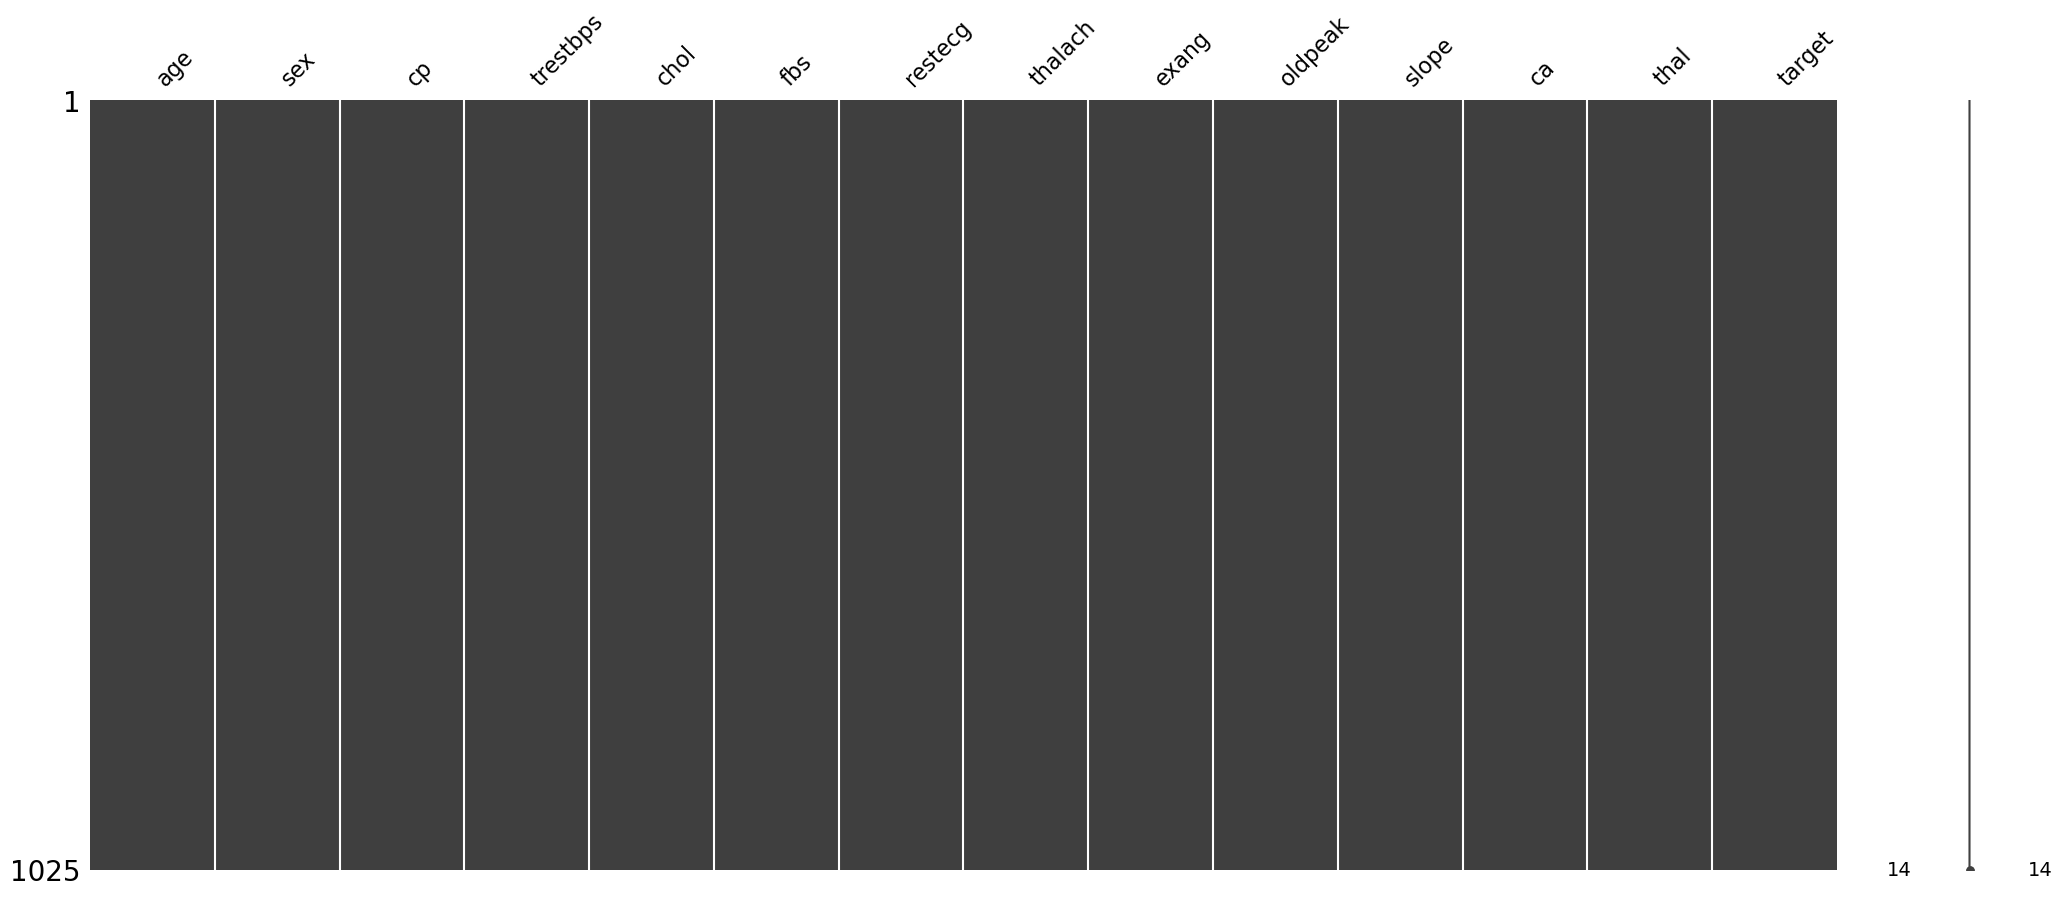

In [8]:
#Checking for any missing values through Visualization
msno.matrix(data)

In [9]:
#checking for missing values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

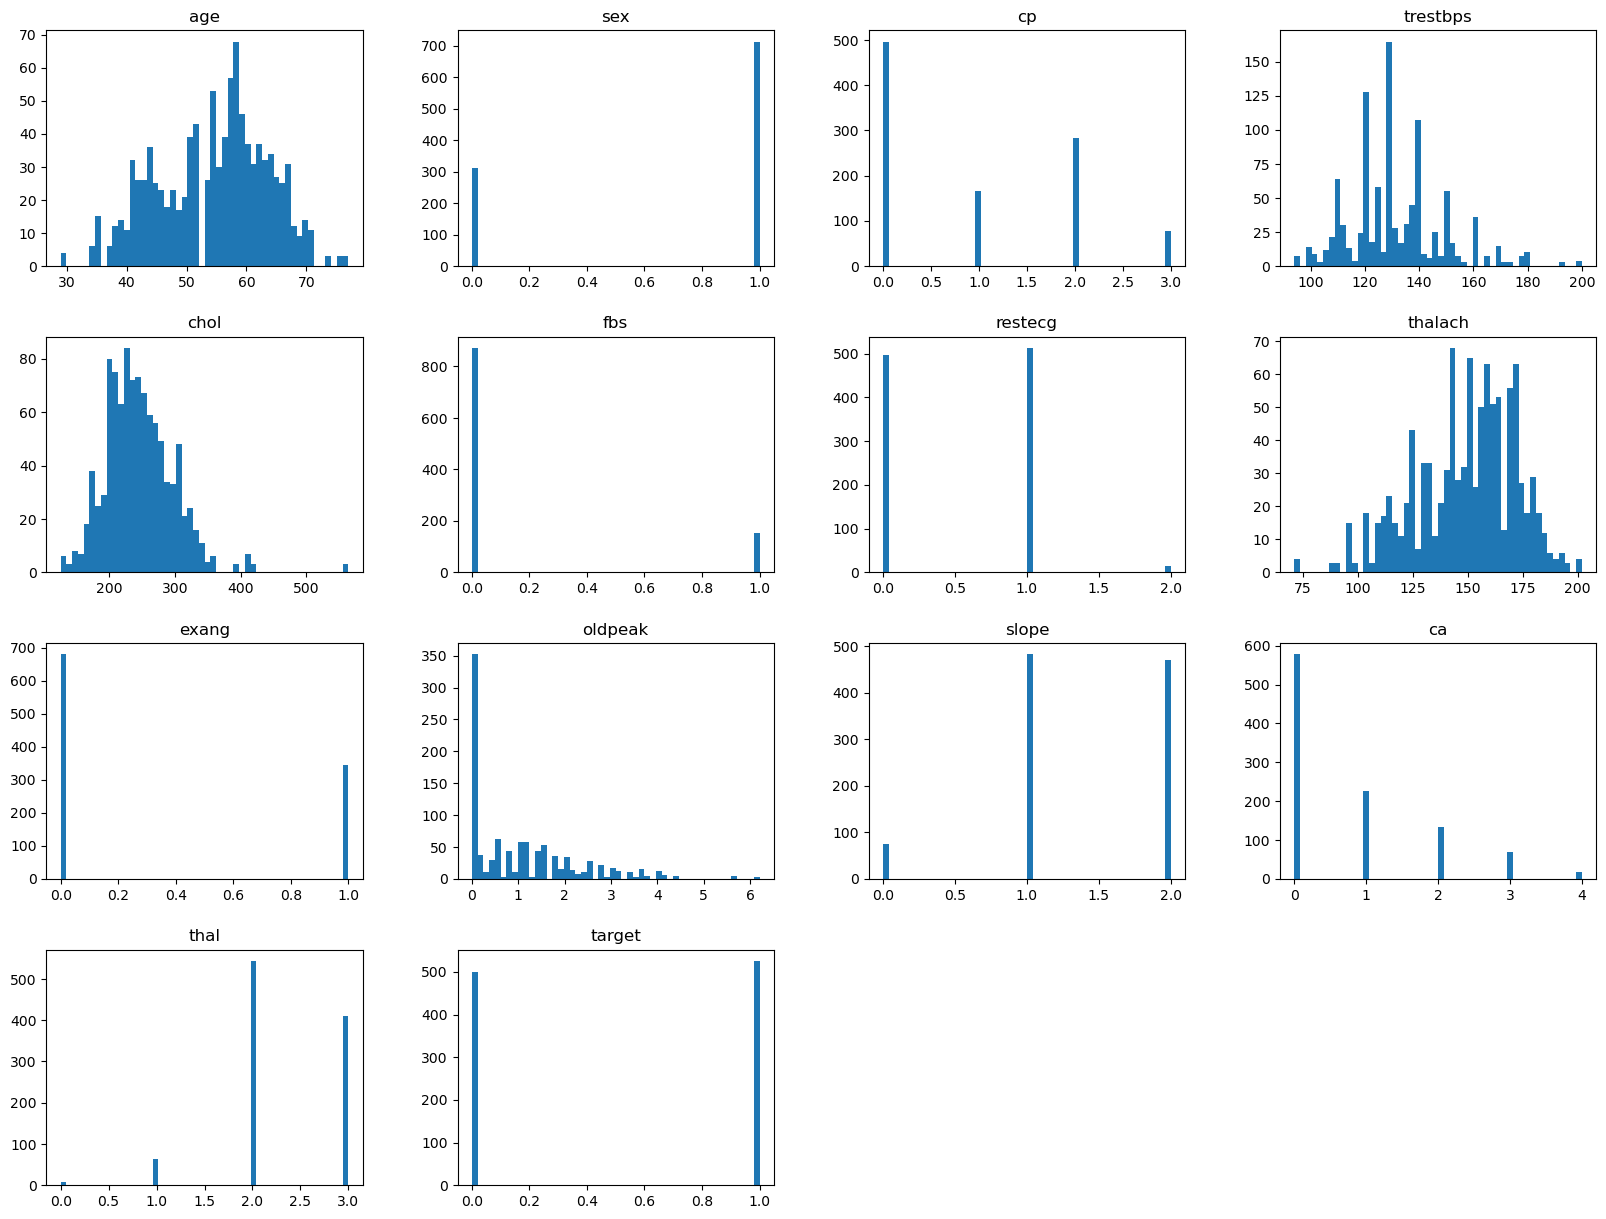

In [10]:
data.hist(bins=50,figsize=(20,15),grid=False);

### Questions:

1. How many people have heart disease and how many people doesn't have heart disease?
2. People with which sex has most heart disease?
3. People of which sex has which type of chest pain most?
4. People with which chest pain are most pron to have heart disease?
5. What is the most common age for heart disease based on sex?
6. How does resting blood pressure vary between patients with and without heart disease?
7. How does the presence of exercise-induced angina correlate with heart disease?
8. How do cholesterol levels vary among patients, and what is the relationship with heart disease?
9. How many major vessels are colored by fluoroscopy, and what is the relationship with heart disease?


In [12]:
# How many people have heart disease and how many people doesn't have heart disease?
data.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

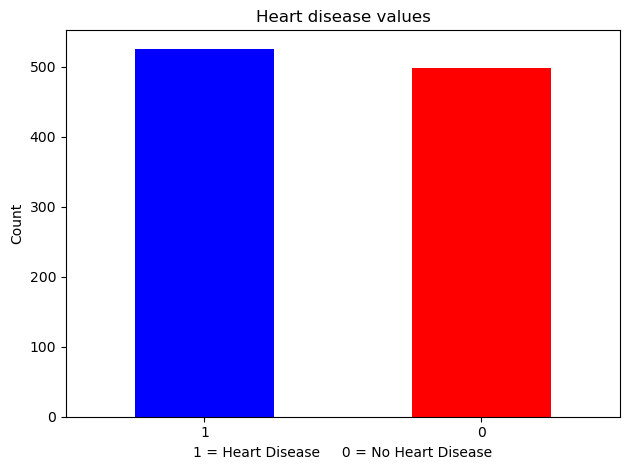

In [13]:
#plotting 
data.target.value_counts().plot(kind='bar',color=['blue','red'])
plt.title('Heart disease values')
plt.xlabel('1 = Heart Disease     0 = No Heart Disease')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.tight_layout()

In [14]:
# People with which sex has most heart disease?
# 0 = female   1 = male
# 1 = Heart Disease     0 = No Heart Disease

pd.crosstab(data.sex,data.target)

target,0,1
sex,,
0,86,226
1,413,300


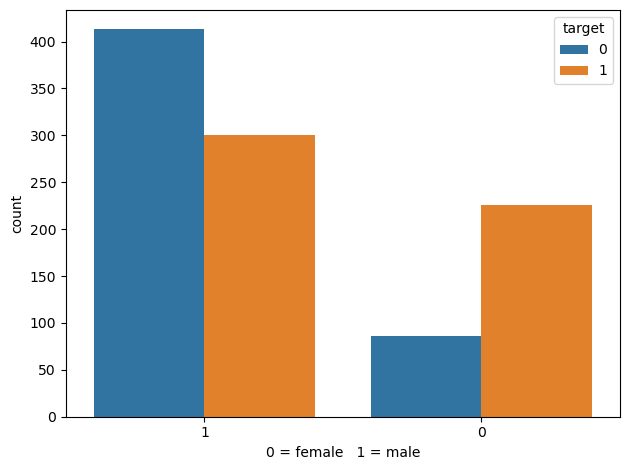

In [15]:
data['sex'] = data['sex'].astype(str)
data['target'] = data['target'].astype(str)
sns.countplot(x = 'sex',data=data,hue='target')
plt.xlabel('0 = female   1 = male')
plt.tight_layout()

In [16]:
# People of which sex has which type of chest pain most?
# 0 = female   1 = male
pd.crosstab(data.sex,data.cp)

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


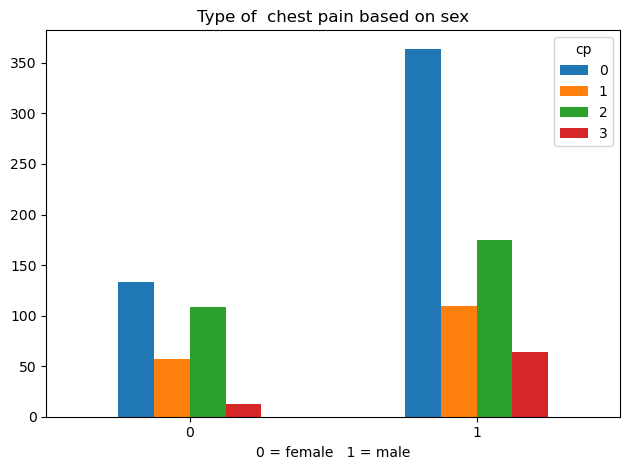

In [17]:
pd.crosstab(data.sex,data.cp).plot(kind='bar')
plt.xlabel('0 = female   1 = male')
plt.title('Type of  chest pain based on sex')
plt.xticks(rotation=0)
plt.tight_layout()

In [18]:
# People with which chest pain are most pron to have heart disease?
pd.crosstab(data.cp,data.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


<Axes: xlabel='cp', ylabel='count'>

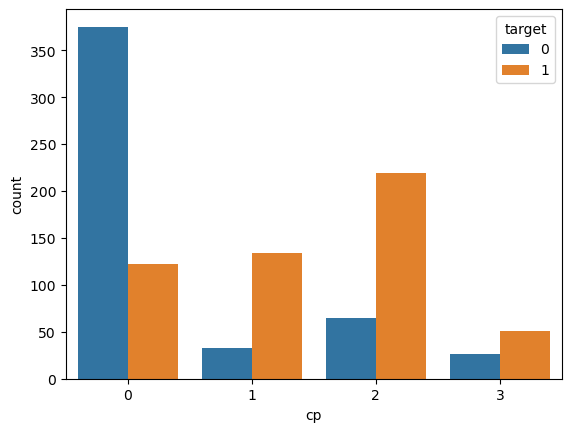

In [19]:
sns.countplot(x='cp',data=data,hue='target')

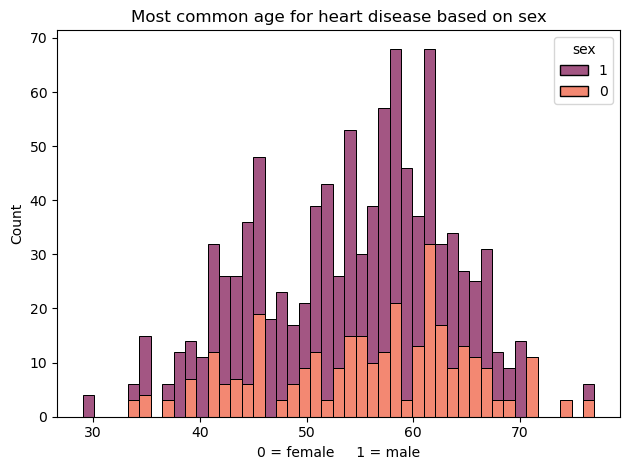

In [20]:
# What is the most common age for heart disease based on sex?
sns.histplot(x='age',data=data,bins=45,hue='sex',multiple='stack',palette='rocket')
plt.title('Most common age for heart disease based on sex')
plt.xlabel('0 = female     1 = male')
plt.tight_layout()

In [21]:
# 0 = female   1 = male
data.groupby('sex')['age'].agg(lambda x : x.mode().tolist())

sex
0    [62]
1    [58]
Name: age, dtype: object

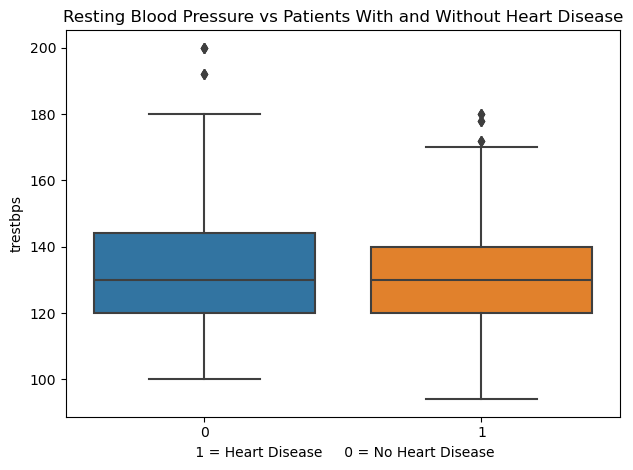

In [22]:
# How does resting blood pressure vary between patients with and without heart disease?
sns.boxplot(y='trestbps',x='target',data=data)
plt.xlabel(' 1 = Heart Disease     0 = No Heart Disease')
plt.title('Resting Blood Pressure vs Patients With and Without Heart Disease')
plt.tight_layout()

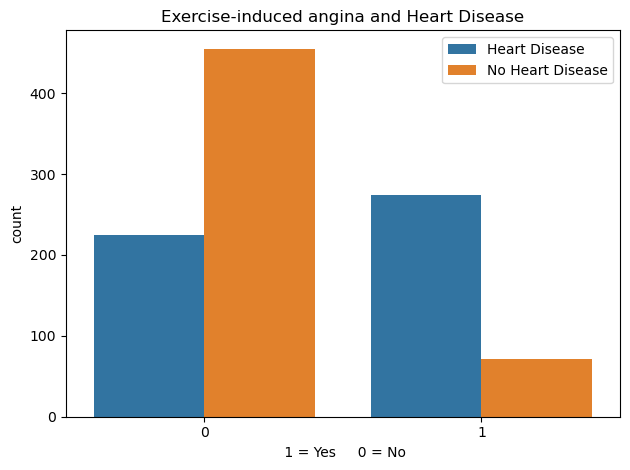

In [23]:
# How does the presence of exercise-induced angina correlate with heart disease?
sns.countplot(x='exang',data=data,hue='target')
plt.xlabel(' 1 = Yes     0 = No')
plt.title('Exercise-induced angina and Heart Disease')
plt.legend(['Heart Disease','No Heart Disease'])
plt.tight_layout()

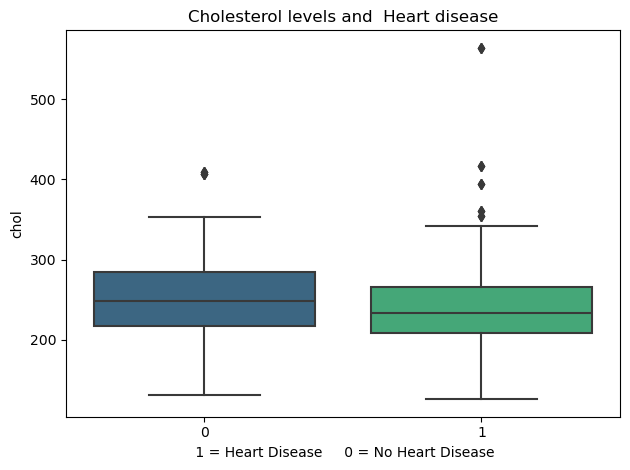

In [24]:
# How do cholesterol levels and its relationship with heart disease?
sns.boxplot(y='chol',x='target',data=data,palette='viridis')
plt.xlabel(' 1 = Heart Disease     0 = No Heart Disease')
plt.title('Cholesterol levels and  Heart disease')
plt.tight_layout()

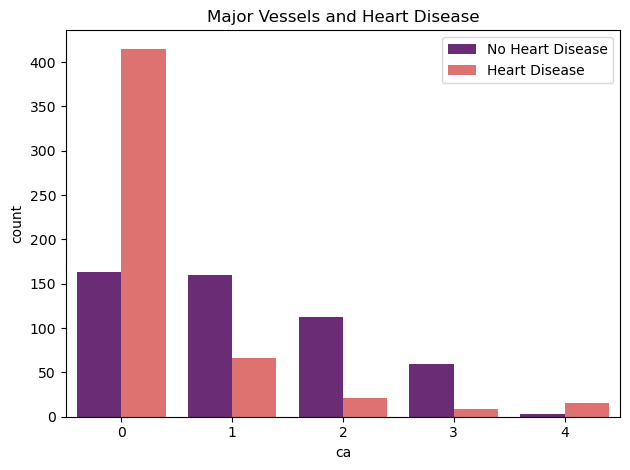

In [25]:
# How many major vessels are colored by fluoroscopy, and what is the relationship with heart disease?
sns.countplot(x='ca',data=data,hue='target',palette='magma')
plt.title('Major Vessels and Heart Disease')
plt.legend(['No Heart Disease','Heart Disease'])
plt.tight_layout()

In [26]:
pd.crosstab(data.ca,data.target)

target,0,1
ca,,
0,163,415
1,160,66
2,113,21
3,60,9
4,3,15
